In [4]:
import numpy as np
import pandas as pd


from sklearn.model_selection import train_test_split


In [5]:
def normalize_data(data):
    if isinstance(data, pd.DataFrame):
        normalized_df = data.copy()
        for column in data.columns:
            max_value = data[column].max()
            normalized_df[column] = data[column] / max_value
        return normalized_df
    else:
        max_value = data.max()
        normalized_series = data / max_value
        return normalized_series

In [9]:
data = pd.read_csv('Dataset_challenge.csv')
X_data = data.drop(columns=['Outcome'])
y_data = data['Outcome']
X_data = normalize_data(X_data)
print(X_data)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1       0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2       0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3       0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4       0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   
..           ...       ...            ...            ...       ...       ...   
763     0.588235  0.507538       0.622951       0.484848  0.212766  0.490313   
764     0.117647  0.613065       0.573770       0.272727  0.000000  0.548435   
765     0.294118  0.608040       0.590164       0.232323  0.132388  0.390462   
766     0.058824  0.633166       0.491803       0.000000  0.000000  0.448584   
767     0.058824  0.467337       0.573770       0.313131  0.000000  0.453055   

     DiabetesPedigreeFunction       Age

In [10]:
X_train = X_data.iloc[1:594]
X_test = X_data.iloc[595:]
y_train = y_data.iloc[1:594]
y_test = y_data.iloc[595:]


In [12]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
print('Original dataset shape %s' % Counter(y_train))

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_sm))


Original dataset shape Counter({0: 388, 1: 205})
Resampled dataset shape Counter({0: 388, 1: 388})


In [13]:
X_train, X_val, y_train, y_val = train_test_split(X_train_sm, y_train_sm, test_size=0.2, random_state=42)

In [14]:
X_train_sm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.145041,0.382716
1,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.277686,0.395062
2,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.069008,0.259259
3,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.945455,0.407407
4,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.083058,0.370370


In [15]:
pip install -q -U keras-tuner


Note: you may need to restart the kernel to use updated packages.


In [16]:
import keras_tuner as kt

ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

SystemError: initialization of _pywrap_checkpoint_reader raised unreported exception

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = keras.Sequential()


    model.add(layers.Input(shape=(8,)))


    for i in range(3):
        units = hp.Int('units_' + str(i), min_value=32, max_value=1024, step=8)
        model.add(layers.Dense(units, activation='relu'))


    model.add(layers.Dense(1, activation='sigmoid'))


    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='keras_tuner_example'
)



tuner.search_space_summary()


tuner.search(x=X_train_sm, y=y_train_sm,
             epochs=100,
             validation_data=(X_test, y_test))


best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best hyperparameters found: {best_hps}")


best_model = tuner.hypermodel.build(best_hps)
best_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))


ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

SystemError: initialization of _pywrap_checkpoint_reader raised unreported exception

In [ ]:
import shutil
import os

# Đường dẫn tới thư mục cần xóa
directory_to_delete = '/content/my_dir'

# Xóa thư mục
shutil.rmtree(directory_to_delete)

In [ ]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train_sm, y_train_sm, epochs=999, validation_data=(X_test, y_test))

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/999
25/25 [==============================] - 3s 31ms/step - loss: 0.6859 - accuracy: 0.5000 - val_loss: 0.6988 - val_accuracy: 0.3584
Epoch 2/999
25/25 [==============================] - 0s 17ms/step - loss: 0.6754 - accuracy: 0.5129 - val_loss: 0.6878 - val_accuracy: 0.4740
Epoch 3/999
25/25 [==============================] - 0s 19ms/step - loss: 0.6626 - accuracy: 0.6340 - val_loss: 0.6685 - val_accuracy: 0.6474
Epoch 4/999
25/25 [==============================] - 0s 9ms/step - loss: 0.6491 - accuracy: 0.6559 - val_loss: 0.6619 - val_accuracy: 0.5954
Epoch 5/999
25/25 [==============================] - 0s 9ms/step - loss: 0.6364 - accuracy: 0.6765 - val_loss: 0.6595 - val_accuracy: 0.5896
Epoch 6/999
25/25 [==============================] - 0s 9ms/step - loss: 0.6351 - accuracy: 0.6224 - val_loss: 0.6159 - val_accuracy: 0.7283
Epoch 7/999
25/25 [==============================] - 0s 9ms/step - loss: 0.6165 - accuracy: 0.6740 - val_loss: 0.6179 - val_accuracy: 0.7225
Epoch 8/99

In [ ]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(X_train_sm, y_train_sm, epochs=best_epoch, validation_data=(X_test, y_test))

Epoch 1/72
25/25 [==============================] - 1s 17ms/step - loss: 0.6880 - accuracy: 0.5090 - val_loss: 0.6976 - val_accuracy: 0.3584
Epoch 2/72
25/25 [==============================] - 0s 9ms/step - loss: 0.6777 - accuracy: 0.5399 - val_loss: 0.6867 - val_accuracy: 0.4971
Epoch 3/72
25/25 [==============================] - 0s 9ms/step - loss: 0.6661 - accuracy: 0.6327 - val_loss: 0.6782 - val_accuracy: 0.5434
Epoch 4/72
25/25 [==============================] - 0s 9ms/step - loss: 0.6539 - accuracy: 0.6534 - val_loss: 0.6609 - val_accuracy: 0.6243
Epoch 5/72
25/25 [==============================] - 0s 10ms/step - loss: 0.6380 - accuracy: 0.6585 - val_loss: 0.6352 - val_accuracy: 0.7168
Epoch 6/72
25/25 [==============================] - 0s 9ms/step - loss: 0.6251 - accuracy: 0.6753 - val_loss: 0.6203 - val_accuracy: 0.7283
Epoch 7/72
25/25 [==============================] - 0s 9ms/step - loss: 0.6134 - accuracy: 0.6611 - val_loss: 0.6305 - val_accuracy: 0.6590
Epoch 8/72
25/25 [

In [ ]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
595,0.000000,0.944724,0.672131,0.141414,0.218676,0.476900,0.281818,0.271605
596,0.000000,0.336683,0.622951,0.000000,0.000000,0.675112,0.080165,0.567901
597,0.058824,0.447236,0.196721,0.191919,0.029551,0.414307,0.230992,0.259259
598,0.058824,0.869347,0.606557,0.000000,0.000000,0.548435,0.036364,0.469136
599,0.058824,0.547739,0.311475,0.181818,0.141844,0.344262,0.168182,0.320988


In [ ]:
y_test.head()

595    1
596    0
597    0
598    1
599    0
Name: Outcome, dtype: int64

In [ ]:
eval_result = hypermodel.evaluate(X_test, y_test)
print("[test loss, test accuracy]:", eval_result)

6/6 [==============================] - 0s 4ms/step - loss: 0.4901 - accuracy: 0.8035
[test loss, test accuracy]: [0.49010083079338074, 0.8034682273864746]


In [ ]:
from keras.models import load_model
model.save("model2.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


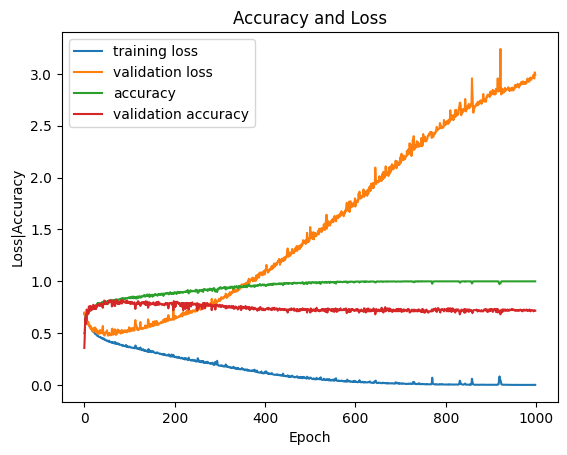

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.arange(0, 999), history.history['loss'], label='training loss')
plt.plot(np.arange(0, 999), history.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, 999), history.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, 999), history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()